# Задача
Качественно очистить датасет, подобрать подходящие значения для заполнения пропусков и создать новые признаки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import re
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
from datetime import datetime, timedelta
from operator import itemgetter
from collections import OrderedDict
import time
from datetime import date

##### Первичный отсмотр данных

In [2]:
data = pd.read_csv('main_task.csv')

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

`Restaurant_id` — идентификационный номер ресторана / сети ресторанов;

`City` — город, в котором находится ресторан;

`Cuisine Style` — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;

`Ranking` — место, которое занимает данный ресторан среди всех ресторанов своего города;

`Rating` — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);

`Price Range` — диапазон цен в ресторане;

`Number of Reviews` — количество отзывов о ресторане;

`Reviews` — данные о двух отзывах, которые отображаются на сайте ресторана;

`URL_TA` — URL страницы ресторана на TripAdvisor;

`ID_TA` — идентификатор ресторана в базе данных TripAdvisor.

In [3]:
display(data.head(5)) 

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


##### Теперь рассмотрим столбцы по отдельности

# Restaurant_id

Этот столбец типа object, заполнен без пропусков.

In [5]:
#Посмотрим сколько уникальных значений
data['Restaurant_id'].nunique()

11909

In [6]:
#Посмотрим какие значения Restaurant_id встречаются чаще 1 раза
display(pd.DataFrame(data['Restaurant_id'].value_counts()))
print("Значений, встретившихся в столбце более 1 раза:"
      , (data['Restaurant_id'].value_counts()>1).sum())
data.loc[:, ['Restaurant_id']].info()

,Restaurant_id
id_227,18
id_633,18
id_871,18
id_436,18
id_585,17
...,...
id_13616,1
id_12473,1
id_4198,1
id_7887,1


Значений, встретившихся в столбце более 1 раза: 7204
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant_id  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


###### Забегая вперед, могу сказать что я пробовала создавать признак "Сетевой ресторан", но его добавление портит качество метрики MAE, поэтому ниже я представлю код, но запускать его я не буду

In [7]:
#Создадим список id сетевых ресторанов
#chain_id_list = []
#counter = 0
#for i in data['Restaurant_id'].value_counts():
   # if i > 1:
      #  chain_id_list.append(data['Restaurant_id'].value_counts().index[counter])
 #   counter +=1

In [8]:
#Проверим, что список заполнен правильно
#len(chain_id_list)

In [9]:
#Создадим новый признак **Chain restaurant**

In [10]:
#data['Chain restaurant'] = data['Restaurant_id'].apply(lambda x: 'Chain restaurant' if x in chain_id_list else 'Individual restaurant')

In [11]:
#data['Chain restaurant'].value_counts()

In [12]:
#Создадим dummy переменные на основе признака Chain restaurant

In [13]:
#data_chain = pd.get_dummies(data['Chain restaurant'])

In [14]:
#Удалим признак, т.к. он содержит информацию типа object, оставим только dummy
#data.drop(['Chain restaurant'], inplace = True, axis = 1)

In [15]:
#data['Chain restaurant'] = data_chain['Chain restaurant']
#data['Individual restaurant'] = data_chain['Individual restaurant']

# City

Этот столбец типа object, заполнен без пропусков.

In [16]:
#Посмотрим сколько городов представлено в наборе данных
data['City'].unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

Добавим новый признак **City population**, идея его создания заключается в том, чтобы превратить название города в число его жителей, тогда при дальнейшем анализе нам не придется избавляться от числовых данных

In [17]:
#Возьмем данные из google
def fill_population(s):
    if s == "Paris":
        return 2.148
    elif s == "Stockholm":
        return 0.976
    elif s == "London":
        return 8.982
    elif s == "Berlin":
        return 3.769
    elif s == "Munich":
        return 1.472
    elif s == "Oporto":
        return 0.214
    elif s == "Milan":
        return 1.352
    elif s == "Bratislava":
        return 0.424
    elif s == "Vienna":
        return 1.897
    elif s == "Rome":
        return 2.873
    elif s == "Barcelona":
        return 5.575
    elif s == "Madrid":
        return 6.642
    elif s == "Dublin":
        return 1.388
    elif s == "Brussels":
        return 0.174
    elif s == "Zurich":
        return 0.403
    elif s == "Warsaw":
        return 1.708
    elif s == "Budapest":
        return 1.752
    elif s == "Copenhagen":
        return 0.603
    elif s == "Amsterdam":
        return 0.823
    elif s == "Lyon":
        return 0.513
    elif s == "Hamburg":
        return 1.845
    elif s == "Lisbon":
        return 0.505
    elif s == "Prague":
        return 1.309
    elif s == "Oslo":
        return 0.681
    elif s == "Helsinki":
        return 0.632
    elif s == "Edinburgh":
        return 0.482
    elif s == "Geneva":
        return 0.5
    elif s == "Ljubljana":
        return 0.28
    elif s == "Athens":
        return 0.664
    elif s == "Luxembourg":
        return 0.614
    elif s == "Krakow":
        return 0.763

In [18]:
data['City population'] = data['City'].apply(fill_population)

# Cuisine Style

Этот столбец типа object, в данных имеются пропуски

In [19]:
#Чтобы определить самый популярный тип кухни, для начала заполним пропуски
data['Cuisine Style'].fillna('nan_cous', inplace = True)

In [20]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: re.findall('\w+\s*[&]*\s*\w*\s*\w*', x))

In [21]:
#Для определения самого популярного типа кухни создадим множество для хранения уникальных значений
cuisines = set()
for i in data['Cuisine Style']:
    for j in i:
        cuisines.add(j)
len(cuisines)

126

In [22]:
# Создадим пустой словарь для хранения информации о кухнях
popular_cuisines = {}  
for item in cuisines:  
    popular_cuisines[item] = 0 
    
for i in data['Cuisine Style']:
    for j in i:
        if j in popular_cuisines.keys():
            popular_cuisines[j] += 1

In [23]:
#Отсортируем словарь
display(OrderedDict(sorted(popular_cuisines.items(), key=lambda t: t[1], reverse=True)))

OrderedDict([('Vegetarian Friendly', 11189),
             ('European', 10060),
             ('nan_cous', 9283),
             ('Mediterranean', 6277),
             ('Italian', 5964),
             ('Vegan Options', 4486),
             ('Gluten Free Options', 4113),
             ('Bar', 3297),
             ('French', 3190),
             ('Asian', 3011),
             ('Pizza', 2849),
             ('Spanish', 2798),
             ('Pub', 2449),
             ('Cafe', 2325),
             ('Fast Food', 1705),
             ('British', 1595),
             ('International', 1584),
             ('Seafood', 1505),
             ('Japanese', 1464),
             ('Central European', 1393),
             ('American', 1315),
             ('Sushi', 1156),
             ('Chinese', 1145),
             ('Portuguese', 1107),
             ('Indian', 1041),
             ('Middle Eastern', 782),
             ('Thai', 743),
             ('Wine Bar', 697),
             ('German', 662),
             ('Healthy', 620)

Очевидно, что самый популярный тип кухни Vegetarian Friendly, заполним пропуски самым популярным значением 

In [24]:
def fill_cuisine(x):
    if x == 'nan_cous':
        return 'Vegetarian Friendly'
    else:
        return x

In [25]:
data['Cuisine Style'] = data['Cuisine Style'].apply(fill_cuisine)

Создадим новый признак **Avg Cuisine Style** - среднее количество кухонь, которое предлагается в одном ресторане

In [26]:
data['Avg Cuisine Style'] = data['Cuisine Style'].apply(lambda x: len(x))

Создадим dummy переменные на основе самых популярных кухонь ( которые описывают большинство (90%) примеров)

In [27]:
pop_cuis = ['Vegetarian Friendly', 'European', 'Mediterranean', 'Italian', 'Vegan Options', 'Gluten Free Options']
data['Cuisine Style List'] = data['Cuisine Style']
data['Cuisine Style List'] = data['Cuisine Style List'].map(lambda x: list(set([i if i in pop_cuis else 'Other' for i in x])))

In [28]:
data = data.join(pd.get_dummies(data['Cuisine Style List'].apply(pd.Series).stack()).sum(level=0))

# Ranking

Это числовой столбец, заполнен без пропусков.

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: Ranking, dtype: float64

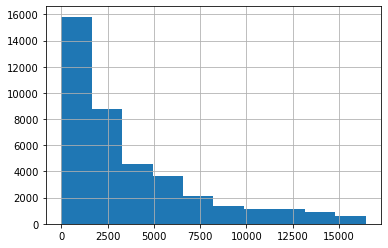

In [29]:
#посмотрим на его распределение:
data['Ranking'].hist()
data['Ranking'].describe()

Видим, что основное распределение лежит между 1 и примерно 3000, есть потенциальные выбросы свыше 15000. Но! Рассуждая логически мы можем прийти к выводу, что рестораны расположены в разных городах, и, к примеру, Лондон в разы больше Лиона или Цюриха, соответственно и ресторанов в Лондоне больше и признак может иметь больший разброс. 

**Disclaimer**: чистка признака от выбросов плохо сказалась на результате MAE, поэтому я решила от нее отказаться

# Rating

Это числовой столбец, заполнен без пропусков. Rating — важный столбец, так как именно его будет учиться предсказывать будущая модель.

count    40000.000000
mean         3.993037
std          0.668417
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

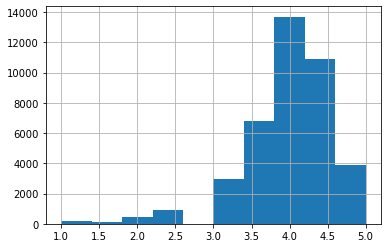

In [30]:
#Посмотрим на распределение оценок:
data['Rating'].hist()
data['Rating'].describe()

Как мы видим, признак распределен нормально, большинство оценок распределены между 3.5 и 4.5, что позволяет сделать два предположения:

1. Скорее всего была использована пятибалльная шкала оценивания
2. В данных нет выбросов.

# Price Range

Этот столбец типа object, в данных имеются пропуски

In [31]:
#Посмотрим сколько вариантов непустых значений встречается в столбце Price Range
data['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

In [32]:
#Посмотрим какой ценовой сегмент является самым популярным
data['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

Средний ценовой сегмент является самым популярным, однако в данных слишком много пропусков и будет лучше заполнить пропуски случайными значениями

In [33]:
#Заполним пропуски в данных случайными значениями
data['Price Range'] = data['Price Range'].fillna(value='$$ - $$$', limit=1)
data['Price Range'] = data['Price Range'].interpolate(method='pad', limit=2)

Создадим dummy переменные на основе столбца Price Range, но для начала приведем информацию в столбце в более читаемый вид

In [34]:
def price_code(s):
    if s == "$$ - $$$":
        return 'medium price'
    elif s == "$$$$":
        return 'high price'
    elif s == "$":
        return 'low price'

In [35]:
data['Price Range'] = data['Price Range'].apply(price_code)

In [36]:
data_price = pd.get_dummies(data['Price Range'])
data['high price'] = data_price['high price']
data['low price'] = data_price['low price']
data['medium price'] = data_price['medium price']

# Number of Reviews

Это числовой столбец, в данных имеются пропуски

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

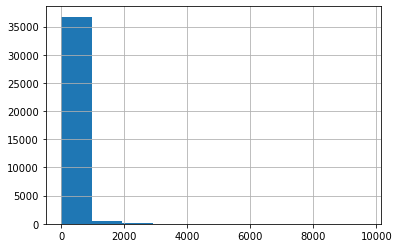

In [37]:
#Посмотрим распределение признака:
data['Number of Reviews'].hist()
data['Number of Reviews'].describe()

Видим, что основное распределение лежит между 0 и 1000 отзывами и есть потенциальные выбросы свыше 1000 отзывов

25-й перцентиль: 9.0, 75-й перцентиль: 115.0, IQR: 106.0,  Границы выбросов: [-150.0, 274.0].


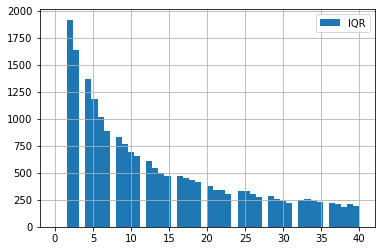

In [38]:
#Воспользуемся формулой интерквартильного расстояния тобы отфильтровать выбросы

median = data['Number of Reviews'].median()
IQR = data['Number of Reviews'].quantile(0.75) - data['Number of Reviews'].quantile(0.25)
perc25 = data['Number of Reviews'].quantile(0.25)
perc75 = data['Number of Reviews'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data['Number of Reviews'].loc[data['Number of Reviews'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 50, range = (0, 40), 
                                                                                             label = 'IQR')
plt.legend();

In [39]:
#Этот способ позволиn нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:
data['Number of Reviews'] = data['Number of Reviews'][data['Number of Reviews'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [40]:
#Заполним пропуски в данных средним значением переменной
mean_abs = round(data['Number of Reviews'].mean(), 0)
data['Number of Reviews'] = data['Number of Reviews'].fillna(mean_abs)

count    40000.000000
mean        51.907175
std         56.733789
min          2.000000
25%         10.000000
50%         38.000000
75%         58.000000
max        274.000000
Name: Number of Reviews, dtype: float64

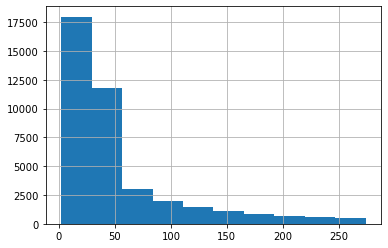

In [41]:
#Еще раз проверим распределение признака
data['Number of Reviews'].hist()
data['Number of Reviews'].describe()

# Reviews

Этот столбец типа object, заполнен без пропусков.

In [42]:
#Сначала посмотрим какая информация содержится в столбце
for i in data['Reviews']:
    print(i)

[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]
[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]
[['Catch up with friends', 'Not exceptional'], ['01/08/2018', '01/06/2018']]
[[], []]
[['Best place to try a Bavarian food', 'Nice building but improvements need to be...'], ['11/18/2017', '02/19/2017']]
[['There are better 3 star hotel bars', 'Amazing views, friendly service and good q...'], ['09/16/2017', '05/31/2017']]
[['Excellent simple local eatery.', 'Excellent Restaurant'], ['08/04/2017', '11/05/2017']]
[['Wasting of money', 'excellent cuisine'], ['02/16/2014', '06/13/2012']]
[[], []]
[['Clean efficient staff', 'Nice little pizza takeaway place'], ['11/07/2017', '03/27/2017']]
[[], []]
[['Not bad for Canary Wharf', 'To be a pilgrim'], ['12/15/2017', '11/22/2017']]
[['Great service, good za', 'Lovely, relaxed atmosphere!'], ['01/07/2018', '12/27/2017']]
[['What a great spot!', 'Healthy superfoods, various lunch of

[[], []]
[[], []]
[['Great spot for lunch', 'Hidden Gem'], ['04/09/2017', '07/25/2016']]
[['Not quite there yet?!', 'Some of the best food in town overlooking...'], ['12/05/2013', '12/01/2013']]
[['Still a Soho Gem', 'Fave SoHo Pub'], ['01/06/2018', '07/20/2017']]
[['Great place to grab a bite!', 'Good service and plenty of food.'], ['12/22/2017', '12/21/2017']]
[['Exquisite Food', 'Excellent Restaurant'], ['01/09/2018', '01/06/2018']]
[['Nice, was in the neighbourhood.', 'Excellent Greek food with quality service.'], ['08/17/2015', '12/14/2013']]
[[], []]
[['Worst food and scam organized by cashier', 'Good value (potentially veggie) fodder'], ['07/09/2015', '06/30/2015']]
[['The Real Prague Coffeeshop'], ['12/13/2017']]
[["Don't miss this true Italian experience", 'Good Meal'], ['12/24/2017', '12/18/2017']]
[['Nice café, friendly hostess', 'Been there before it will be cool :)'], ['11/07/2016', '04/28/2015']]
[['Great little place for a pick me up.', 'Horrible service with good raviol

[['Delightful French bistro in the heart of S...'], ['10/07/2014']]
[['Regular visitor', 'greasy spoon old school'], ['04/27/2017', '11/02/2017']]
[[], []]
[['very good, nice and friendly', 'A very cozy place'], ['09/23/2017', '04/30/2017']]
[['Great Service & Tapas', 'Great food and value'], ['03/28/2014', '06/29/2013']]
[['Best customer service'], ['02/28/2017']]
[['A true Greek experience!', 'Amazing'], ['09/11/2017', '08/10/2017']]
[['Late lunch', 'Delicious Asian treats - big portions'], ['09/18/2017', '09/09/2017']]
[[], []]
[['Very mellow', 'No understanding for non smokers'], ['03/29/2017', '01/11/2017']]
[['Fresh food', 'First spot in Milan and yet the best'], ['03/23/2017', '09/10/2016']]
[['Something a little bit different.........', 'Excellent dinner'], ['07/17/2016', '07/09/2016']]
[[], []]
[['friendly waitress, nasty food', 'Good family restaurant'], ['11/02/2017', '10/16/2016']]
[['Delicious food.', 'Great neighborhood place to eat'], ['05/27/2017', '05/13/2017']]
[['a w

[['Awesome taste', 'Great food'], ['01/03/2018', '11/19/2017']]
[['Reliable quality of food and good service', 'Interlude dinner'], ['12/01/2017', '06/03/2017']]
[['Great Syrian food'], ['10/07/2017']]
[['Lovely place in Montmartre', 'Excellent food and Personal Service'], ['12/21/2017', '11/30/2017']]
[['Clean, peacfull, parking, no playground', "A god McDonald's restaurant"], ['06/29/2016', '10/06/2015']]
[['December vacation 2017', 'very good indian restaurant'], ['01/02/2018', '03/01/2017']]
[['Sometimes the small places, are the true w...'], ['11/26/2015']]
[[], []]
[['Good food,great service', 'Friendly and fast'], ['12/19/2017', '10/16/2017']]
[[], []]
[['Rijstaffel on a rice plate!', 'couple dinner'], ['01/08/2018', '01/06/2018']]
[['Sunday business lunch', 'Filipino food at its best!'], ['05/17/2017', '07/31/2016']]
[['Surprise', 'Salad in glass jar'], ['10/12/2017', '09/26/2017']]
[['Not bad, decent sushi but busy venue', 'New Year Eve dinner'], ['01/31/2017', '01/04/2017']]


[['Excellent Kerala food', 'A touch of Kerala outside Kerala'], ['01/08/2018', '01/07/2018']]
[['Good food, great service, nice ambiance'], ['09/11/2014']]
[[], []]
[['Nice bar in Gracia', 'Just for a drink'], ['04/15/2017', '02/20/2017']]
[['Great value for price', 'Delicious'], ['05/20/2017', '01/03/2018']]
[['Fun place, good drinks', 'Great Cocktail Bar'], ['03/20/2017', '03/19/2017']]
[[], []]
[['Wonderful deli/small restaurant', 'A little piece of Italy in Wimbledon'], ['06/08/2017', '07/28/2015']]
[['Good sushi and yakiniku', 'Value for money'], ['08/07/2015', '09/09/2014']]
[['Quick, easy, fresh', 'Visit to London'], ['01/04/2018', '09/06/2017']]
[['Nice stop close to Santa Maria Maggiore', 'Excellent food Excellent value'], ['11/16/2017', '10/31/2017']]
[['Counter Douche', 'Cosy'], ['12/31/2017', '10/05/2017']]
[['uzbek national food', 'Nice food!'], ['11/20/2017', '11/14/2017']]
[['Great food', 'Hidden Surprise'], ['12/22/2016', '10/13/2013']]
[['Fresh, tasty, friendly!', 'The

[['The time machine'], ['10/06/2016']]
[['Breakfast', "Best chicken baguette I've ever had"], ['01/27/2017', '09/20/2017']]
[[], []]
[['Excellent', 'Chill out afternoon'], ['12/19/2017', '12/17/2017']]
[['Fully recommended', 'Best fish restaurant in the area'], ['12/03/2017', '11/12/2017']]
[["Old 60's style Dublin Pub"], ['12/29/2016']]
[[], []]
[['Lovely restaurant in characteristic area o...', 'Lovely place for dinner'], ['07/18/2017', '06/20/2017']]
[['Great atmosphere near the woods'], ['06/06/2015']]
[['Excellent breakfast and brunch', 'Nice cozy cafe'], ['12/23/2017', '09/07/2017']]
[['Great showcase of Danish cuisine', 'RESTAURANT RADIO'], ['01/08/2018', '12/28/2017']]
[['Usual stuff', 'nice pattisserie type cakes'], ['08/12/2017', '09/22/2016']]
[['Very poor', 'Great takeaway!'], ['05/21/2017', '02/10/2016']]
[[], []]
[['Tasty kebab!'], ['10/07/2017']]
[["Landlord's last night", 'Beautiful grounds. Romantic :)'], ['10/02/2017', '06/20/2017']]
[['Fine for breakfast', 'Late-nigh

[['Favourite bistro in town. Must try their F...', 'The real French cuisine experience like a...'], ['08/05/2014', '07/27/2014']]
[['Poland is mad about dim sum now'], ['07/05/2016']]
[['Old Sadness', 'Take awsy'], ['11/06/2016', '10/08/2016']]
[['Best dessert', 'been there for the second time in 3 month'], ['06/03/2015', '11/20/2012']]
[['Bottled cocktails?'], ['12/03/2017']]
[['No icecream served'], ['11/13/2017']]
[['Marvelous food and a great experience.', 'Like the 2004 Boston Red Sox'], ['01/05/2018', '12/30/2017']]
[['Fine Bistro in good spot', 'Great Spot and Fanastic Service'], ['12/16/2017', '09/30/2017']]
[['Nice place'], ['03/04/2017']]
[['Highly recommended', 'Good Burrito'], ['01/08/2018', '12/31/2017']]
[['Brilliant cosy friendly place with properl...', 'Amazing little place with unforgettable, f...'], ['12/12/2017', '10/16/2017']]
[['Pizza and wine', 'Awful experience'], ['04/06/2017', '11/27/2016']]
[['Best Greek food in town', "'Fallen idol'"], ['10/22/2016', '06/03/2

[['Nice but a bit pricy', 'Excellent Lunch'], ['05/28/2017', '03/29/2017']]
[['Amazing experience', 'Excellent service, quite good food, tired...'], ['01/06/2018', '01/02/2018']]
[['Buffalo', 'Amazingly tasty burger'], ['06/15/2017', '10/21/2015']]
[['Elegant and friendly.'], ['05/07/2016']]
[['If I could give it zero I would', "Over an hour's wait"], ['12/08/2017', '10/23/2017']]
[['Great little place to eat in Lisbon', 'Delicious food & sangrias'], ['10/20/2017', '05/12/2017']]
[['Set Menu, Awesome Food', 'Small, romantic and enjoyable restaurant'], ['07/19/2017', '04/27/2017']]
[[], []]
[['Cute!', 'Great small place among the green'], ['09/05/2017', '10/11/2017']]
[['Artisan Bakery - Eat Like A Local!!'], ['02/23/2017']]
[['Eat healthy and super budget friendly'], ['10/19/2017']]
[[], []]
[['Menu was a bit messy. Food great', 'Cheap sushi'], ['02/27/2017', '01/02/2018']]
[['Delucious', 'No.1 authentic chinese food!!!!'], ['07/25/2017', '06/11/2017']]
[['Dips Out For The Lads', 'Fest

[['What a find!', 'A Great Bar in a Great Hotel'], ['07/20/2017', '07/08/2017']]
[['BAD - avoid at all costs!', 'Drama'], ['10/18/2017', '02/06/2017']]
[['Super wee cafe', 'Fab wee greasy spoon'], ['04/04/2017', '02/03/2017']]
[[], []]
[['Good food, good prices', 'great eats on a budget in fun medieval atm...'], ['10/07/2016', '07/18/2016']]
[['Good', 'Nothing time complain about'], ['12/18/2017', '06/09/2017']]
[['My favourite wine bar in Paris', 'Great for a drink and a few bites'], ['11/21/2017', '11/27/2016']]
[['this is now called La Quimera', 'Any Reviews?'], ['06/08/2017', '03/23/2014']]
[['Simply AMAZING!', 'Delicious Burgers'], ['01/01/2018', '11/22/2017']]
[['Hot Desk and A mixed View', 'Nice venue, below par food and service.'], ['12/28/2017', '12/04/2017']]
[['Light and good meals', 'Late night support'], ['09/04/2017', '03/04/2017']]
[['Friendly staff and great food', 'Great local'], ['02/13/2016', '01/21/2016']]
[['Bad place that used to be nice', 'Superb Pub With Superb 

[['Friendly service and great prices!'], ['09/30/2017']]
[['Awful!', 'Great breakfast and a brilliant price'], ['11/13/2016', '03/09/2016']]
[['Love this boulangerie', 'Lovely family run bakery'], ['04/17/2017', '09/15/2016']]
[['Best pizza delivery in Rudlofsheim', 'Good price w/ good food.'], ['12/15/2015', '07/22/2015']]
[['TOP location lake front, view, AND service...', 'Great food'], ['06/14/2017', '12/22/2015']]
[[], []]
[['Perfect breakfast'], ['09/02/2015']]
[['One for the locals'], ['07/31/2016']]
[['It’s a must go!', 'Loved the food and would go again!'], ['02/22/2018', '02/19/2018']]
[['Very cozy and tasty!', 'Excellent food, warm welcome, but a bit sl...'], ['10/23/2016', '04/22/2016']]
[['Good food and good service', 'Great food in a very beautiful setting'], ['12/09/2017', '12/03/2017']]
[['Awesome', 'Good food and reasonable service in relaxe...'], ['03/22/2017', '09/22/2016']]
[['Seemingly lovely but not quite the case', 'hot fresh pizza late at night for takeaway...'],

[["It's open late"], ['10/18/2015']]
[['Not the worst but still ...', 'Nice restaurant with good food'], ['09/23/2017', '08/23/2016']]
[['Amazing Burgers', 'Friends and family'], ['12/29/2017', '12/13/2017']]
[['When in Lisbon - you must visit this wonde...', 'Wining day'], ['02/18/2018', '02/12/2018']]
[['Genuine Korean style', 'A fun dining experience.'], ['09/07/2017', '02/11/2017']]
[[], []]
[['YUMMY!!!', 'Great food, fantastic service'], ['03/15/2015', '10/21/2014']]
[['Great Thai Food and very fair prices!', 'Very very disappointing.'], ['11/29/2015', '07/22/2015']]
[['Glad we stopped', 'Lovely but need a patience'], ['06/29/2016', '05/28/2014']]
[['THE BEST pizza I have ever had!!!!', 'Terrible service'], ['07/02/2017', '05/17/2017']]
[['Limited appeal', 'Good news for Asian food amatures in Lyon'], ['09/11/2017', '08/27/2017']]
[['Great gig venue for intimate gigs - used t...', 'Camden Assembly and Playroom'], ['10/26/2017', '09/12/2017']]
[['Really great Tibetan Food', 'Tibeta

[['Tasty.', 'Best Mexican food in town'], ['10/30/2017', '02/12/2017']]
[['Great reservation', 'Incredible restaurant'], ['01/09/2018', '01/09/2018']]
[['Very nice place, great Wein', 'not attentive staff'], ['07/06/2017', '07/10/2017']]
[['A delight for the stomach', 'Large choice of beer, good food and lovely...'], ['11/13/2017', '06/18/2017']]
[[], []]
[['OK food, decent drinks', 'Thai'], ['11/16/2017', '10/02/2017']]
[['The Jewish Restaurant located in Prague ci...', 'Shabbat meal'], ['12/25/2017', '11/13/2017']]
[[], []]
[['Great lunch, fresh homemade pasta', 'GREAT RESTAURANT'], ['07/23/2017', '06/29/2017']]
[['The BEST in London!!', 'Will go back often'], ['12/08/2017', '11/11/2017']]
[[], []]
[['Buffets are excellent', 'Bavarian cuisine'], ['12/16/2017', '04/27/2016']]
[['Pleasant Surprise, taste of India', 'Delicious Indian flavors'], ['10/10/2016', '06/26/2016']]
[['Friendly waiter, decent food.', 'Avoid!'], ['11/25/2017', '09/11/2017']]
[['Nice place to have a drink, shame a

[['New location for this Chinese restaurant', 'Good food, no space to move, not very frie...'], ['11/09/2017', '05/21/2017']]
[['Ideal for lunch, less so for supper', 'Mediocore'], ['11/30/2017', '10/21/2017']]
[['A lovely place', 'Home store'], ['08/02/2016', '08/13/2015']]
[['Decent Macarons -- IF YOU KNOW HOW TO CHOO...'], ['10/25/2015']]
[["We'll worth it!", 'Good food and good price'], ['11/27/2014', '03/08/2014']]
[['Nice Lunch, But Odd Reaction to Request', 'Lovely'], ['11/19/2017', '11/18/2017']]
[['Nice', 'Great value mixed grill'], ['12/09/2017', '08/12/2017']]
[['Good for fast lunch!', 'Affordable sushi'], ['05/04/2017', '04/10/2017']]
[['Lovely Surprise'], ['10/27/2017']]
[[], []]
[['Great stop off by the river'], ['01/01/2018']]
[['Excellent food and reasonable cost', 'Del tio Manolo!'], ['01/28/2017', '09/05/2016']]
[['Great!', 'Lovely break in Prague'], ['01/09/2018', '05/15/2017']]
[[], []]
[['meat rules!', 'Job Dinner'], ['10/04/2017', '06/05/2017']]
[['Cosy atmosphere

[['Small and cosy', 'Great restaurant'], ['11/25/2017', '04/30/2017']]
[['Beautiful food and great coffee', 'A simple place with excellent food'], ['01/05/2018', '12/07/2017']]
[[], []]
[['Delicious homemade mango icecream!', 'Not that great and not authentic Indian cu...'], ['03/30/2017', '11/03/2017']]
[[], []]
[['my experience was not that good as most de...', 'Simple but friendly'], ['07/20/2017', '03/05/2017']]
[[], []]
[[], []]
[['Very nice and cosy', 'Lucky Find'], ['11/20/2017', '11/05/2017']]
[['Nice place to lunch', 'Good'], ['10/11/2015', '08/09/2015']]
[[], []]
[[], []]
[['A confusing start with an OK finish', 'Quirky with a view and great design'], ['12/29/2017', '12/08/2017']]
[['Excellent wine selection with great Italia...', 'Dinner with family at Christmas'], ['12/22/2017', '12/20/2017']]
[['Small Portions', 'Local chinese restaurant'], ['09/17/2016', '03/23/2016']]
[['Delicious', 'Best Japanese restaurant in town'], ['01/07/2018', '12/29/2017']]
[['hidden café gem', '

[['new restaurant here now; but a good tapas...', "Doesn't exist anymore"], ['04/11/2017', '03/29/2017']]
[['Good Restaurant close to Pere Lachaise', 'Cute place near pere lachaise'], ['09/25/2017', '07/01/2017']]
[['Lovely Dinner', 'The myth was reality'], ['01/10/2017', '11/14/2016']]
[['A real surprise'], ['04/21/2016']]
[['Cracking boozer', 'Amazing'], ['12/17/2017', '11/06/2017']]
[['No frills Polish food'], ['09/03/2015']]
[['Monsieur Restaurant Lunch-time', 'wonderful atmosphere and food ... almost'], ['10/08/2017', '01/14/2017']]
[['Always a nice place to dine', 'Amazing!'], ['09/02/2017', '06/11/2017']]
[['Good simple food reasonably priced', 'Good Czech Food'], ['09/26/2017', '04/18/2017']]
[[], []]
[['Great neighborhood restaurant', 'Good Food. Very correct reaction to a comp...'], ['12/31/2017', '12/29/2017']]
[['Too Expensive!', 'Basic food and unfriendly waiters'], ['07/20/2017', '05/14/2017']]
[['Snack', 'Solar...'], ['05/28/2016', '02/16/2016']]
[['Reasonable food and p

[['Historic local', "Traditional London Sam Smith's"], ['12/28/2017', '10/22/2017']]
[['nice pizza and nice people'], ['02/03/2016']]
[['Our neighborhood pizzaria', 'Quick lunch, tasty pizza!'], ['01/01/2017', '09/09/2016']]
[['The alternative of halal restaurant in Edi...', 'Very good'], ['01/03/2018', '10/25/2017']]
[[], []]
[['Nice place for a big group', 'Great Italian Food'], ['07/11/2017', '03/01/2017']]
[['Delicious food and family atmosphere', 'Becsiszelet Brody Restaurant'], ['06/09/2017', '03/28/2017']]
[['Overcharged', 'Bangladeshi authentic'], ['01/05/2018', '11/27/2017']]
[[], []]
[['Botega jewel', 'It is not a restaurant!!!'], ['01/26/2017', '05/12/2017']]
[['Caters for Everyone', 'Brunch'], ['12/31/2017', '11/26/2017']]
[['lakeside restaurant', 'Good value for money'], ['07/29/2017', '09/10/2013']]
[[], []]
[['Good libanese food', 'Great food and nice service.'], ['11/20/2016', '08/06/2016']]
[['German food', 'Nice German restaurant'], ['11/17/2017', '10/02/2017']]
[['Ex

[['Outstanding pizza (and burger) place in Ea...', 'Lovely Restaurant!'], ['10/24/2017', '10/13/2017']]
[['Excellent food', 'Tasty middle eastern food'], ['01/06/2018', '12/22/2017']]
[['GREAT service!'], ['09/17/2017']]
[['Great orxata!', 'Good Orchata'], ['05/29/2017', '04/28/2017']]
[['Good Fish But Freezing Inside', 'Still as it is'], ['11/25/2016', '09/19/2016']]
[['Simply lovely!', 'Pathetic'], ['07/15/2016', '06/01/2016']]
[['Typical French Brasserie cuisine'], ['11/30/2015']]
[['exquisite food', 'Heunisch- excellent meals and wine connois...'], ['11/28/2017', '11/25/2017']]
[['Formal good', 'Business and romantic at the same time'], ['07/28/2017', '06/27/2017']]
[['Amazing Café', 'Excellent food, service and coffee'], ['12/06/2017', '11/25/2017']]
[['Great food, great vibes'], ['12/16/2017']]
[['As expected!', 'Nice'], ['11/13/2017', '10/22/2017']]
[['Berlin Christmas Markets', 'Great local burgers'], ['12/20/2017', '12/15/2017']]
[['Nice place for Gyoza', 'Fresh and tasty, bud

[['Delicious!', 'An hidden gem'], ['09/27/2017', '08/09/2015']]
[['Decent wok fried food', 'Tasty and fresh street food'], ['12/21/2017', '12/15/2017']]
[['Classic Italian', 'Authentic Italian food'], ['12/23/2017', '12/21/2017']]
[['Lovely breakfast time', 'Great hospitality received here'], ['11/17/2017', '11/13/2017']]
[['Overcharged! Ripoff!'], ['05/24/2016']]
[['Great lunch'], ['09/18/2014']]
[['Mr', 'One of the Best Afghan Restaurants'], ['11/05/2016', '08/21/2016']]
[['average and overpriced', 'Someplace To Go'], ['10/04/2017', '07/11/2017']]
[['Nice locals restaurant'], ['08/23/2017']]
[['Great coffee and pastries, sandwiches, ver...', 'Great breakfast!'], ['02/21/2017', '09/19/2016']]
[['Love this place, go every time we are in P...', 'Lovely food'], ['05/22/2016', '02/26/2016']]
[['Great value all you can eat', 'Excellent sushi at a great peice'], ['10/24/2017', '05/21/2017']]
[['Amazing food with the best of seafood opti...', 'Very nice'], ['02/08/2018', '02/19/2017']]
[['Go

[['Gluten free goodies'], ['08/09/2017']]
[['Lovely food', 'Great restutant'], ['11/05/2015', '04/11/2012']]
[['Nice dinner'], ['09/23/2017']]
[['gfuh', 'Meglia pizza al taglio di roma'], ['11/28/2016', '08/30/2015']]
[['The owner is a lovely man!'], ['08/19/2015']]
[[], []]
[["Fine dining at it's best", 'Xmas dinner'], ['01/08/2018', '01/06/2018']]
[['Takes you in another age', 'Great breakfast'], ['01/07/2018', '01/03/2018']]
[['Gay friendly cafe/bar with good drinks, av...', 'A favourite, BUT...'], ['11/09/2017', '08/25/2017']]
[['Very Welcoming'], ['10/18/2009']]
[['Quirky dinner but good experience', '"Fun with Good Food"'], ['12/20/2017', '05/29/2017']]
[['Fantastic German food', 'What a place!!! 😳'], ['05/28/2017', '05/17/2017']]
[[], []]
[['When rain came down during lunch, we opted...', 'dinner with the colleagues'], ['07/07/2017', '05/31/2017']]
[['Cheery & Friendly But a Touch Too Much Mon...', 'great a bit slow though'], ['01/05/2018', '12/15/2017']]
[['Gluten free crepes',

[[], []]
[['Worthwhile', 'Very good food'], ['02/12/2018', '02/07/2018']]
[['Good Food', 'Great find'], ['01/09/2018', '01/04/2018']]
[['Okay Pasta But Burgers Look Great', 'Very Good burger'], ['02/20/2018', '02/11/2018']]
[['Good prices and food, pleasant service', 'What a service'], ['11/30/2017', '11/23/2017']]
[[], []]
[['Good food but a bit overpriced', 'Proper sushi'], ['08/19/2017', '07/30/2017']]
[['A lucky find on Christmas day', 'A Welcoming atmosphere!!'], ['12/25/2017', '12/23/2017']]
[['One of the Best', 'you CAN get good Asian food in Vienna!'], ['06/13/2017', '04/14/2017']]
[['Bad service, bad food', 'Perfect brunch'], ['12/08/2017', '08/20/2017']]
[['Awesome Korean Restaurant', 'Probably the best Korean in Paris!'], ['11/24/2017', '08/16/2017']]
[['Tasty food, poor service', 'Expensive and overrated'], ['05/29/2017', '07/11/2017']]
[['Definitely worth a visit', 'Good dinner good price'], ['09/15/2017', '08/16/2017']]
[['Excellent quality food accompanied by well...'], 

[['Best Pizza Ever'], ['11/06/2017']]
[['A different option, good basic food for hu...', 'good buffet on the sea'], ['06/15/2017', '01/04/2017']]
[['Good wine, nice atmosphere', 'Cold empty pub/miserable humourless barman'], ['02/23/2017', '02/14/2017']]
[['Good Old Café & Bar in Central Madrid', 'afternoon meeting place'], ['11/06/2017', '05/02/2017']]
[['Lunch with family', 'Love this place!!!!'], ['01/22/2017', '07/04/2017']]
[['Great local', 'Authentic Thai cuisine, friendly staff, go...'], ['12/27/2017', '07/15/2017']]
[['Generous', 'Very good'], ['11/24/2017', '11/21/2017']]
[[], []]
[['Nice food.'], ['10/17/2015']]
[[], []]
[['Great Saturday evening', 'Nice italian food and attentive waiters'], ['12/12/2017', '10/17/2017']]
[['A little great place'], ['01/12/2017']]
[['Good', 'Nice place'], ['12/04/2017', '08/05/2017']]
[['handy cafe near local attraction with grea...', 'Soup is great'], ['04/26/2017', '02/24/2017']]
[["It's a new world of flavors!!", 'Orange IS the new black'],

[[], []]
[['Disappointing', 'Busy & noisy place, good food, medium-priz...'], ['12/29/2017', '12/26/2017']]
[['Excellent Italian food', 'Lunch stop'], ['12/01/2017', '11/30/2017']]
[['Nice and Spicy!', 'Awesome noodles'], ['12/16/2017', '09/17/2017']]
[['Tomato bread', 'Great place!'], ['09/23/2017', '08/03/2017']]
[['Old Viennese cuisine', 'Pleasant lunch on a quiet side street of b...'], ['09/23/2017', '07/09/2017']]
[['Fair priced and great meat', 'Friendly evening'], ['01/09/2018', '12/04/2017']]
[[], []]
[['Delicious!', 'Mrs marika'], ['11/03/2017', '07/21/2017']]
[['Delicious, tonnes of options, fab coffee a...', 'Popular lunchtime destination... for a rea...'], ['01/10/2018', '11/13/2017']]
[['Always Good', 'Incredible food and atmosphere'], ['04/28/2017', '12/03/2016']]
[['Excellent food', 'Tasty, fresh and fragrant'], ['07/16/2017', '04/02/2017']]
[['Nice brunch', 'Good food and great service'], ['05/05/2015', '08/09/2014']]
[[], []]
[[], []]
[['portuguese food at its best', '

[['AMAZING', 'A wonderful place with friendly staff!'], ['01/07/2018', '01/06/2018']]
[['A taste of the high life', 'Great Bar'], ['12/12/2017', '11/26/2017']]
[['Great food and atmosphere', 'fantastic atmosphere and authentic cuisine'], ['12/30/2017', '12/30/2017']]
[['expensive'], ['02/21/2013']]
[['Good Lebanese food', 'Favorite is the eggplant dip'], ['01/07/2018', '03/20/2017']]
[[], []]
[['simple and good', 'Great fries!'], ['11/18/2017', '11/03/2017']]
[['Low Cost and Amazing Food'], ['09/24/2017']]
[['Great cosy fish restaurant', 'Sardegna in your plate'], ['12/13/2017', '09/04/2017']]
[['Fabulous, family chinese', 'Stay away'], ['11/11/2017', '10/16/2016']]
[['Delicious Salmon Soup', 'Best Meal of our holiday!'], ['01/03/2018', '01/02/2018']]
[['Avoid', 'Nothing Special but good service'], ['12/06/2017', '09/15/2016']]
[['Great city views', 'Tartan Roof'], ['11/25/2017', '10/20/2017']]
[['Friendly staff, good food', 'I want this banana bread everyday'], ['11/16/2017', '10/06/2

[['A great example of a Parisian restaurant', 'Just the right place for intimate atmosphe...'], ['11/27/2017', '11/20/2017']]
[['Not the best experience', 'Ripped off'], ['06/30/2017', '12/19/2015']]
[['Excellent food, sluggish service', 'A Very Pleasant Experience'], ['01/12/2018', '12/31/2017']]
[[], []]
[['Great Italian food', 'Nice little Italian Restaurant'], ['01/04/2018', '12/28/2017']]
[['Slow service, food is not good', 'Good for Breakfast'], ['11/19/2017', '08/28/2017']]
[['Average!!!!!', 'Service and food quality became unacceptab...'], ['02/16/2017', '12/27/2016']]
[[], []]
[['Wonderful meat and very friendly staff', 'Nice Schoneberg hideaway. Great pastries'], ['02/26/2017', '11/18/2016']]
[['Love this Restaurant', 'an authentic bistrot in a very poor gastro...'], ['07/02/2017', '06/29/2017']]
[['Excellent little restaurant with friendly...', 'excellent wine selection. and very charmin...'], ['04/19/2017', '02/10/2017']]
[['Ok', 'Great service!'], ['04/26/2017', '04/26/201

[['Good food and drinks'], ['12/27/2017']]
[['Good food in Tivoli', 'Tivoli Dinner'], ['10/25/2017', '10/17/2017']]
[['When it suits them!', 'Ridiculous rules!'], ['12/15/2014', '09/09/2014']]
[['Very interesting', 'Oldiest pub in Krakau?'], ['10/30/2017', '09/15/2017']]
[['Great Food - Cash Only!!', 'Shalimar'], ['11/23/2017', '08/03/2017']]
[['Super as usual', 'Manga Manga Manga'], ['02/14/2017', '09/19/2017']]
[[], []]
[['CDG location', 'Well above average sandwich'], ['08/31/2017', '08/11/2017']]
[[], []]
[['Nice Restaurant Close to Central Station', 'French Brasserie - nice atmosphere'], ['12/26/2017', '05/17/2017']]
[['Straightforward Caff'], ['01/28/2016']]
[['Correct food, terrible service'], ['08/04/2016']]
[[], []]
[['Best Ossobuco', 'New team, but still charming and delicious'], ['03/03/2017', '09/13/2016']]
[['Pleasant surroundings', 'Quite simply, one of the worst hotel dinin...'], ['03/22/2017', '08/12/2016']]
[['A beautiful surprise in Milan!', 'Greatest Pasta Good beef'

[['Good lunch !', 'Amazing food, friendly staff'], ['07/12/2017', '02/03/2018']]
[['a generous treat', 'Best quality/price ratio for libanaise res...'], ['04/06/2016', '05/19/2015']]
[['Different Kind of Sauce', 'Freshly cooked and tasty'], ['07/02/2017', '01/09/2018']]
[['Lovely courtyard restaurant', 'Delicious food in an extraordinary setting'], ['09/04/2016', '08/30/2016']]
[['Good quality food', 'Poor quality food. Shoddy delivery'], ['03/08/2017', '07/31/2016']]
[['Authentic Italian Paninis with A Smile', 'Great sandwiches and fantastic ingredients'], ['04/17/2017', '03/10/2017']]
[['good, clean and friendly', 'Highly recommended'], ['07/25/2016', '06/25/2016']]
[['Typical Viennese food', 'Traditional Viennese kitchen in cozy updat...'], ['12/24/2017', '12/17/2017']]
[['Great food and ambience', 'Great food'], ['11/25/2017', '11/09/2017']]
[[], []]
[['Just great!', 'Great food, great people, great value.'], ['11/09/2017', '05/16/2017']]
[['A really good breakfast', 'excellent foo

[['Lovely intimate restaurant in a quiet part...', 'watch out!'], ['10/19/2016', '03/09/2015']]
[['Czech style place', 'Great little spot near the river'], ['04/11/2017', '11/10/2016']]
[[], []]
[['Excellent bar with a great underground vib...'], ['07/20/2016']]
[["Won't go again.", 'Drinks and Live Music'], ['04/01/2017', '05/28/2017']]
[['Better than expected', 'Wish This Was an International Chain Resta...'], ['10/20/2017', '09/30/2017']]
[[], []]
[['Great lunch in an iconic building', 'Good lunch restaturang'], ['11/18/2017', '09/21/2016']]
[['Cheap Eats'], ['09/13/2014']]
[['Perfect for quick lunch with colleagues', 'A welcome chance find'], ['10/18/2017', '09/15/2017']]
[['Need of more professionality', 'Excellent fish platter'], ['11/07/2017', '05/30/2015']]
[['Excellent experience to visit over there', 'A very good café'], ['02/07/2017', '10/10/2016']]
[['Could try harder'], ['05/28/2014']]
[['Excellent', 'Best Jerk Chicken'], ['09/30/2017', '06/10/2017']]
[['Awful restaurant f

[['Lovely friendly local pub, best Sunday roa...', 'New years Eve'], ['10/11/2017', '01/18/2017']]
[['Ok kebab'], ['07/05/2017']]
[['Dinner', 'Great place, even for Easter dinner'], ['10/08/2016', '04/10/2013']]
[[], []]
[[], []]
[['Amazing Tuna', 'Good Sushi and Good Service'], ['12/03/2017', '11/19/2017']]
[['Nice take away'], ['03/31/2016']]
[['Super chicken gyros', 'Gyro greatness'], ['12/02/2017', '11/19/2017']]
[['Excellent food, service, atmosphere', 'Fantastic!!'], ['07/04/2017', '05/21/2016']]
[['Probably the best Pizza for me, the new at...', 'Expensive but beautiful view'], ['10/18/2016', '09/12/2016']]
[['Plain food and overwhelmed service'], ['06/30/2015']]
[['Family meal', 'Excellent restaurant with a loveley'], ['09/05/2017', '01/07/2018']]
[[], []]
[['Great options', 'Excellent Neighborhood Restaurant'], ['12/11/2017', '07/04/2017']]
[['Excellent for the price!', 'Definitely worth it'], ['10/29/2017', '08/13/2017']]
[['Cheap and authentique !', 'Fast food'], ['03/16/201

[['Modern friendly deliciou', 'High end delicious Japanese fusion food'], ['01/19/2018', '12/21/2017']]
[['Great service, great food, great atmospher...', 'A great family restaurant'], ['01/01/2018', '11/25/2017']]
[['High quality food!'], ['10/22/2016']]
[['Outstanding food with some extraordinary w...', 'Excellent experience'], ['12/31/2017', '12/31/2017']]
[['Family dinner', 'The Restaurant did not improve over time'], ['05/23/2017', '09/16/2016']]
[['Simple', 'Avoid'], ['06/22/2017', '11/11/2017']]
[['Attention to detail', 'good food'], ['08/05/2017', '04/04/2017']]
[['Loved our lunch', 'Eclectic Restauant - Average Experience'], ['05/12/2017', '10/19/2017']]
[['Very good neighborhood joint', 'Typical local trattoria'], ['11/02/2017', '10/04/2017']]
[['Fine Dining in Praga', 'Modern take on Warsaw’ 20’ties grandour'], ['01/10/2018', '12/05/2017']]
[['Terrible customer service', 'A wonderful change of cuisine'], ['11/11/2017', '10/18/2017']]
[['Typical Parisian brasserie', 'nice pla

[['Great hotel highly recommended', 'Deceptive service and food offer'], ['12/18/2014', '07/27/2013']]
[['tasty indian food', 'On tullut pahempaakin take-awayta syötyä...'], ['02/26/2013', '09/04/2008']]
[['Very high quality food but stressed waiter', 'Running from the rain'], ['07/22/2017', '09/06/2017']]
[['Good Food and Nice Staff', 'B.I.A Breakfast Club'], ['01/03/2018', '10/17/2017']]
[['Authentic German food in authentic German...'], ['01/15/2016']]
[['Stylish, spacious but focused on serving l...', 'Great restaurant visited when attending St...'], ['01/06/2018', '10/29/2017']]
[['Lovely on a stormy afternoon', 'Expensive but we went for the experience'], ['01/05/2018', '01/04/2018']]
[['Super lässig!', 'Best bread in Prague!'], ['08/23/2017', '12/25/2016']]
[['Class restaurant - food served far too qui...', 'Sisters 50th birthday'], ['01/02/2018', '12/19/2017']]
[['Fantastic food, service and quality', 'Great little Italian place'], ['09/12/2017', '07/12/2017']]
[['The Rose on P

[[], []]
[['Something new in Geneve'], ['05/28/2015']]
[['Good Italian in Harbor area', 'Bad Service'], ['05/25/2017', '06/11/2017']]
[['Good - maybe very good?', 'In the dinner'], ['01/04/2018', '11/16/2017']]
[['Fully renovated'], ['04/02/2012']]
[['Value for the money', 'Great kebab'], ['09/04/2017', '03/10/2017']]
[['Wonderful discovery !', 'Very nice restaurant'], ['08/19/2017', '07/28/2017']]
[['Good atmosphere', 'Fine wine and gourmet bites'], ['12/05/2017', '11/06/2017']]
[[], []]
[[], []]
[['Always dependable', 'Fresh Asian Food with No Frills'], ['11/13/2017', '09/29/2016']]
[['Good pizza, ok service', 'Average food but friendly environment'], ['12/01/2017', '08/14/2017']]
[['The best value for money in the retiro are...'], ['10/07/2017']]
[['Cost and friendly', 'Nice'], ['12/27/2017', '12/04/2017']]
[['Ideal place for Hygge vibes', 'Nice craft beer place'], ['11/01/2017', '10/15/2017']]
[['Good place for a quick coffee'], ['06/19/2014']]
[[], []]
[[], []]
[[], []]
[['Like mo

[['Pleasant place for a lunch', 'Warm family lunch restaurant'], ['12/28/2016', '07/26/2016']]
[['The worst service in Madrid / El peor serv...', 'Good, honest Spanish food.'], ['05/21/2016', '03/18/2016']]
[['Not only mainstream dishes', 'Easy weekday dinner'], ['03/03/2017', '03/16/2017']]
[[], []]
[['have a coffee and look around', 'Amazing food'], ['10/04/2017', '08/30/2017']]
[['Exelent', 'Yummy food'], ['11/10/2017', '05/27/2017']]
[["Much better than any other doughnut I've h...", 'Quick Gluten Free doughnut'], ['09/28/2017', '09/27/2017']]
[['FAR TOO NOISY FOR COMFORT', 'Excellent food and service.'], ['04/15/2017', '05/21/2017']]
[['Sunday Brunch', 'Amazing place'], ['12/07/2017', '12/03/2017']]
[['excellent introduction to Italian Gelato a...', 'Great place for long lunch in nice locatio...'], ['11/24/2017', '10/29/2017']]
[['Excellent service', 'Georgian food'], ['10/26/2017', '10/23/2017']]
[['Good food cheap price', 'Good food for great price'], ['05/20/2014', '05/10/2014'

Мы видим, что в столбце хранятся отзывы и даты публикации отзывов в формате str, однако некоторые строки заполнены некорректно, очевидно, что при сборе данных произошла ошибка.

In [43]:
#Посчитаем сколько строк заполнено некорректно
count = 0
for i in data['Reviews']:
    if i == '[[], []]':
        count +=1
print(count)

6471


Удалим эти строки, т.к. из них нельзя извлечь полезной информации

In [44]:
count = 0
for i in data['Reviews']:
    if i == '[[], []]':
        data.drop(index = count, inplace = True, axis = 0)
    count +=1

Теперь извлечем даты из строки и запишем их в отдельные столбцы, для этого воспользуемся регулярным выражением

In [45]:
data['Reviews date 1'] = data['Reviews'].apply(lambda x: re.findall(r'\d\d\/\d\d\/\d{4}', x))

In [46]:
data['Reviews date 2'] = data['Reviews date 1']

In [47]:
data['Reviews date 1'] = data['Reviews date 1'].apply(lambda x: x[0])

In [48]:
data['Reviews date 2'] = data['Reviews date 2'].apply(lambda x: x[1] if len(x) > 1 else x[0])

Приведем данные в колонках "Reviews date 1" и "Reviews date 2" к формату datetime

In [49]:
data['Reviews date 1'] = data['Reviews date 1'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [50]:
data['Reviews date 2'] = data['Reviews date 2'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

Создадим новый признак **Dif_Reviews date**, который содержит информацию о том, какое количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана

In [51]:
data['Dif_Reviews date'] = data['Reviews date 1'] - data['Reviews date 2']

In [52]:
#Посмотрим на распределение признака, для этого переведем его в формат int
data['Dif_Reviews date'] = data['Dif_Reviews date'].dt.days.astype('int16')

count    33529.000000
mean       107.226789
std        219.371038
min       -362.000000
25%          3.000000
50%         38.000000
75%        132.000000
max       3207.000000
Name: Dif_Reviews date, dtype: float64

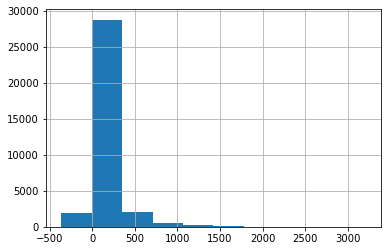

In [53]:
data['Dif_Reviews date'].hist()
data['Dif_Reviews date'].describe()

Можно заметить, что основное распределение лежит между 0 и 300 днями и есть потенциальные выбросы свыше 500 дней

25-й перцентиль: 3.0, 75-й перцентиль: 132.0, IQR: 129.0,  Границы выбросов: [-190.5, 325.5].


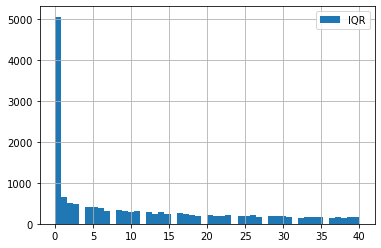

In [54]:
#Воспользуемся формулой интерквартильного расстояния тобы отфильтровать выбросы

median = data['Dif_Reviews date'].median()
IQR = data['Dif_Reviews date'].quantile(0.75) - data['Dif_Reviews date'].quantile(0.25)
perc25 = data['Dif_Reviews date'].quantile(0.25)
perc75 = data['Dif_Reviews date'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data['Dif_Reviews date'].loc[data['Dif_Reviews date'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 50, range = (0, 40), 
                                                                                             label = 'IQR')
plt.legend();

In [55]:
#Этот способ позволиn нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:
data['Dif_Reviews date'] = data['Dif_Reviews date'][data['Dif_Reviews date'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [56]:
#Заполним пропуски в данных средним значением переменной
mean_abs = round(data['Dif_Reviews date'].mean(), 0)
data['Dif_Reviews date'] = data['Dif_Reviews date'].fillna(mean_abs)

count    33529.000000
mean        58.681589
std         79.606663
min       -190.000000
25%          4.000000
50%         41.000000
75%         84.000000
max        325.000000
Name: Dif_Reviews date, dtype: float64

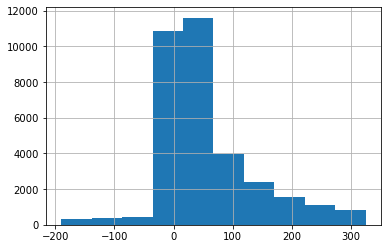

In [57]:
#Еще раз проверим распределение признака
data['Dif_Reviews date'].hist()
data['Dif_Reviews date'].describe()

Признак распределен нормально

Столбцы **URL_TA** и **ID_TA** мы рассматривать не будем, т.к. из них нельзя извлечь какой-либо полезной информации

### Еще раз посмотрим на данные

In [58]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,City population,Avg Cuisine Style,Cuisine Style List,European,Gluten Free Options,Italian,Mediterranean,Other,Vegan Options,Vegetarian Friendly,high price,low price,medium price,Reviews date 1,Reviews date 2,Dif_Reviews date
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,medium price,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2.148,3,"[Other, European]",1,0,0,0,1,0,0,0,0,1,2017-12-31,2017-11-20,41.0
1,id_1535,Stockholm,[nan_cous],1537.0,4.0,medium price,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0.976,1,[Other],0,0,0,0,1,0,0,0,0,1,2017-07-06,2016-06-19,59.0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",353.0,4.5,high price,52.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8.982,7,"[Other, Vegan Options, Vegetarian Friendly, Gl...",0,1,0,0,1,1,1,1,0,0,2018-01-08,2018-01-06,2.0
4,id_615,Munich,"[German, Central European, Vegetarian Friendly]",621.0,4.0,medium price,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1.472,3,"[Other, Vegetarian Friendly]",0,0,0,0,1,0,1,0,0,1,2017-11-18,2017-02-19,272.0
5,id_1418,Oporto,[nan_cous],1419.0,3.0,medium price,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536,0.214,1,[Other],0,0,0,0,1,0,0,0,0,1,2017-09-16,2017-05-31,108.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33529 entries, 0 to 39999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant_id        33529 non-null  object        
 1   City                 33529 non-null  object        
 2   Cuisine Style        33529 non-null  object        
 3   Ranking              33529 non-null  float64       
 4   Rating               33529 non-null  float64       
 5   Price Range          32529 non-null  object        
 6   Number of Reviews    33529 non-null  float64       
 7   Reviews              33529 non-null  object        
 8   URL_TA               33529 non-null  object        
 9   ID_TA                33529 non-null  object        
 10  City population      33529 non-null  float64       
 11  Avg Cuisine Style    33529 non-null  int64         
 12  Cuisine Style List   33529 non-null  object        
 13  European             33529 non-

# Модель

In [60]:
#Удалим столбцы, содержащие нечисловые данные
data.drop(['City'], inplace = True, axis = 1)
data.drop(['Cuisine Style'], inplace = True, axis = 1)
data.drop(['Price Range'], inplace = True, axis = 1)
data.drop(['Reviews'], inplace = True, axis = 1)
data.drop(['URL_TA'], inplace = True, axis = 1)
data.drop(['ID_TA'], inplace = True, axis = 1)
data.drop(['Cuisine Style List'], inplace = True, axis = 1)
data.drop(['Reviews date 1'], inplace = True, axis = 1)
data.drop(['Reviews date 2'], inplace = True, axis = 1)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33529 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        33529 non-null  object 
 1   Ranking              33529 non-null  float64
 2   Rating               33529 non-null  float64
 3   Number of Reviews    33529 non-null  float64
 4   City population      33529 non-null  float64
 5   Avg Cuisine Style    33529 non-null  int64  
 6   European             33529 non-null  uint8  
 7   Gluten Free Options  33529 non-null  uint8  
 8   Italian              33529 non-null  uint8  
 9   Mediterranean        33529 non-null  uint8  
 10  Other                33529 non-null  uint8  
 11  Vegan Options        33529 non-null  uint8  
 12  Vegetarian Friendly  33529 non-null  uint8  
 13  high price           33529 non-null  uint8  
 14  low price            33529 non-null  uint8  
 15  medium price         33529 non-null 

### Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [62]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = data.drop(['Restaurant_id', 'Rating'], axis = 1)
y = data['Rating']

In [63]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [64]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Создаём, обучаем и тестируем модель

In [65]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [66]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [67]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.23125909578909698
